# Products and Competitors Producst

In [3]:
import pandas as pd
import numpy as np
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Import data and missing value visualization

### products 

information about Wayfair products sold online

Field | Type | Description
--- | --- | ---
website_name | STRING |	Name of Wayfair vendor website
product_id | INTEGER | Unique ID for product in question
product_name | STRING | Name of product in question
category_name | STRING | Name of category given to product
description	STRING | Product | description
manufacturer_name | STRING | Name of the manufacturer of the product
weight | FLOAT | The weight of the product in pounds
dimension_1 | FLOAT | First product dimension in inches
dimension_2 | FLOAT | Second product dimension in inches
dimension_3 | FLOAT | Third product dimension in inches
num_reviews | FLOAT | Number of reviews on the product
onsite_price | FLOAT | The price Wayfair listed for the product on their website
on_promotion | INTEGER | 1 if the product is on promotion else 0


In [2]:
df_products = pd.read_csv('data/products.csv')
print(df_products.shape)
df_products.head()

NameError: name 'pd' is not defined

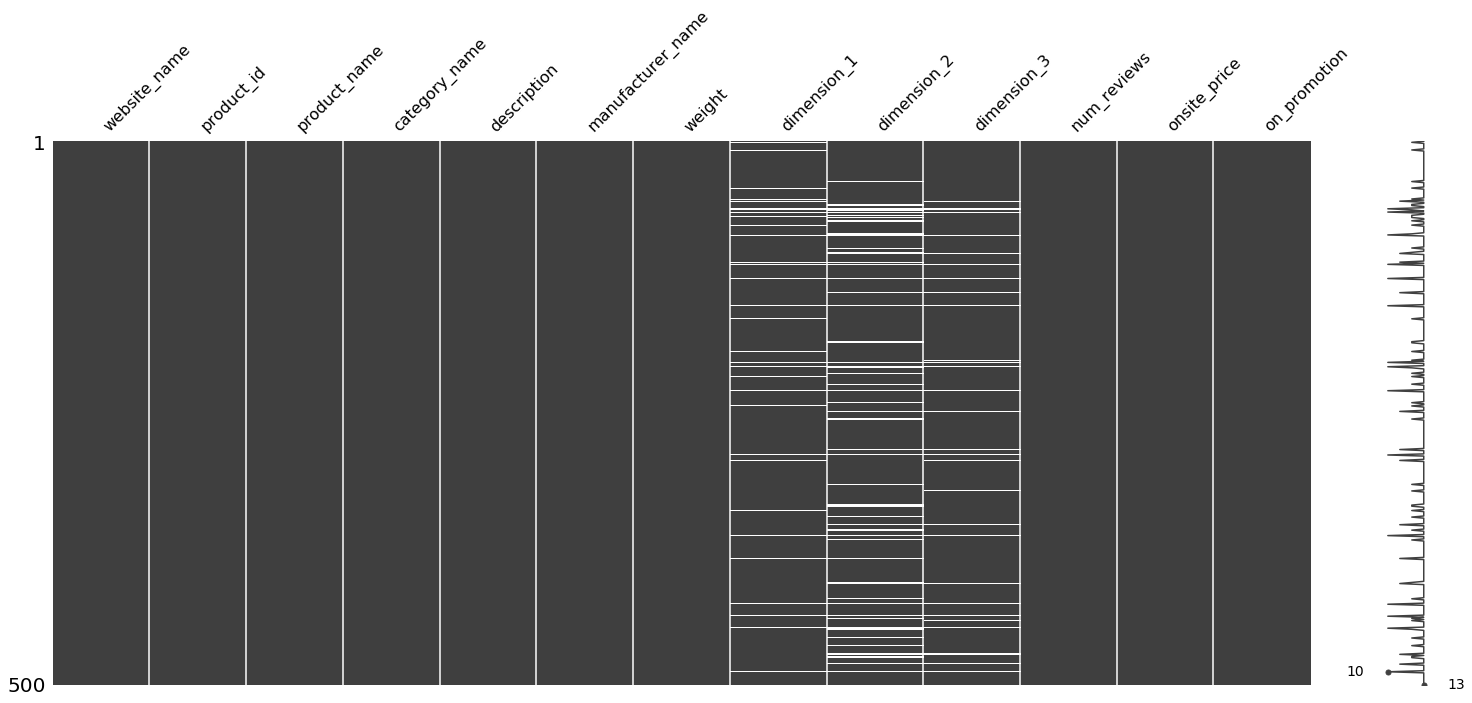

In [31]:
msno.matrix(df_products.sample(500))

Missing values come from three dimension columns

### comp_products

Information about products of Wayfair’s competitors that are sold online. 

Field | Type  | Description
---| --- | ---
comp_website_name | STRING | Name of competitor website
comp_product_id | INTEGER | Unique ID for each competitor product
comp_product_name | STRING | Name of the product
category_name | STRING | How Wayfair categorizes this product
comp_description | STRING | Product description
comp_price | FLOAT | The price listed on the competitor’s website


In [83]:
df_comp_products = pd.read_csv('data/comp_products.csv')
print(df_comp_products.shape)
df_comp_products.head()

(1234567, 6)


,comp_website_name,comp_product_id,comp_product_name,category_name,comp_description,comp_price
0,amazon,6597043735844019455,"Trademark Art Kathie McCurdy Colors of Green, ...",Wall Art,"Artist: Kathie McCurdy, Subject: Floral Style:...",71.99
1,amazon,6114697460212133124,"Pfister Raincan Showerhead, Polished Chrome",Shower Heads,"Rain spray provides more coverage and a soft, ...",21.00
2,amazon,743431437000632207,"Alno A7066-BRZ Spa 1 Modern Tissue Holder, Bro...",Toilet Paper Holders,Made by Alno Upc - 785584020087 Vendor Item Nu...,42.71
3,overstock,3528449255436755526,Premier Copper Products LO19RRDB Widespread Fa...,Bathroom Sinks,ITEM#: 15394278 ...,475.00
4,amazon,7102979767482509121,"Royal Designs Twisted Pleat Basic Lamp Shade, ...",Lighting Shades,Shade Dimensions: 6 x 12 x 9 (Top x Bottom x H...,64.95


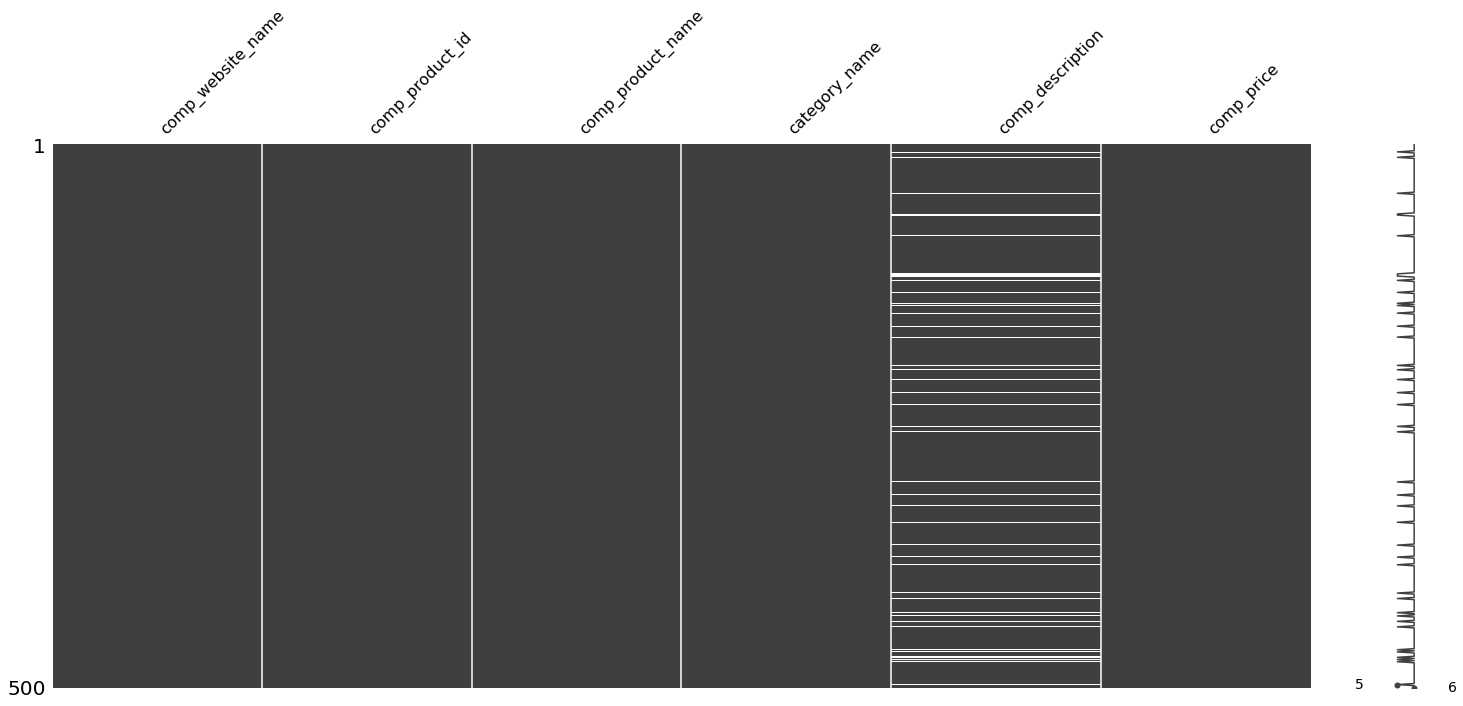

In [33]:
msno.matrix(df_comp_products.sample(500))

Missing values come from comp_description column.

## Competitor website name

Combine the competitor webiste name, because the original website name is chaotic, need to combine the same company.

In [20]:
df_comp_products.comp_website_name.value_counts()


amazon              698443
amazonca            129242
overstock           112117
build                99194
amazonde             64051
amazonuk             35550
Lowes                15534
Walmart              13581
walmart              11061
Worldstores           9796
staples               8419
Amazon                5933
worldstores           5753
amazonCA              5336
Hayneedle             4820
target                3390
houzzUS               2752
home24                2622
Jet                   1254
amazonDE              1131
hayneedle             1047
amazonUK               830
lowes                  715
BestBuyCA              407
Amazonuk               356
Overstock              268
otto                   257
Build                  250
Staples                187
HouzzUS                 88
Amazonde                81
houzzus                 68
ajmadison               12
AmazonUK                10
atgstores                9
bedbathandbeyond         1
AmazonDE                 1
e

In [145]:
df_comp_products.comp_website_name = df_comp_products.comp_website_name.str.lower()
df_comp_products.comp_website_name = df_comp_products.comp_website_name.str.replace('amazon\w*','amazon')
df_comp_products.comp_website_name = df_comp_products.comp_website_name.str.capitalize()
comp_name_count = df_comp_products.comp_website_name.value_counts(ascending=True)
data = [go.Bar(
    x = comp_name_count.values,
    y = comp_name_count.index,
    orientation = 'h'
)]
layout = go.Layout(title = 'Competitor Website Name Distribution')
iplot(dict(data = data, layout = layout))

In [105]:
df_products.website_name.value_counts()

Wayfair US    497264
Joss US           11
Name: website_name, dtype: int64

## Category Name

Merge products and comp_products based on category name

In [171]:
df_products.category_name.value_counts(ascending=True).iloc[-30:,]

Blankets And Throws                  2931
Vanity Lighting                      2974
Wall Sconces                         3020
Flush Mount Lighting                 3024
Sofas                                3034
Candle Holders                       3089
Cabinet and Drawer Knobs             3119
Wallpaper                            3136
Curtains & Drapes                    3290
Vases, Urns, Jars, & Bottles         3420
Floor & Wall Tile                    3465
Chandeliers                          3637
Accent Chairs                        3664
Dining Chairs                        3842
Shower Curtains                      4035
Mats                                 4325
Bar Stools                           4577
Cabinet and Drawer Pulls             4675
Bedding Sets                         4889
Garden Statues & Outdoor Accents     5098
End Tables                           5162
Wall & Accent Mirrors                5257
Wall Stickers                        5501
Wall Décor                        

In [191]:
data = [go.Bar(
    x = df_products.category_name.value_counts(ascending=True).iloc[-20:,].values,
    y = df_products.category_name.value_counts(ascending=True).iloc[-20:,].index,
    orientation = 'h'
)]
layout = go.Layout(
    title = 'Wayfair Category Name Distribution(Top 20)',
    height = 600
)
iplot(dict(data = data, layout = layout))

In [192]:
data = [go.Bar(
    x = df_comp_products.category_name.value_counts(ascending=True).iloc[-20:,].values,
    y = df_comp_products.category_name.value_counts(ascending=True).iloc[-20:,].index,
    orientation = 'h'
)]
layout = go.Layout(
    title = 'Competitor Category Name Distribution(Top 20)',
    height = 600
)

iplot(dict(data = data, layout = layout))

For both Wayfair and Competitors, area rugs and wall art are the most common categories.  
Customer might prefer to buy area rugs and wall art from all of these websites

In [87]:
categories = set(df_products.category_name.values).intersection(set(df_comp_products.category_name.values))
len(categories)

901

In [88]:
df_products = df_products[df_products.category_name.isin(categories)]
df_comp_products = df_comp_products[df_comp_products.category_name.isin(categories)]

In [1]:
df1 = df_comp_products.groupby(['comp_website_name','category_name']).mean().iloc[:,1].unstack().T
df1.shape

NameError: name 'df_comp_products' is not defined

In [142]:
df2 = df_products.groupby(['website_name','category_name']).mean().iloc[:,1].unstack().T

In [165]:
df = pd.concat([df1,df2],axis=1)
df

,Ajmadison,Amazon,Atgstores,Bedbathandbeyond,Bestbuyca,Build,Ebags,Hayneedle,Home24,Houzzus,Jet,Lowes,Otto,Overstock,Staples,Target,Walmart,Worldstores,Joss US,Wayfair US
category_name,,,,,,,,,,,,,,,,,,,,
Accent Chairs,NaN,378.435760,NaN,NaN,NaN,595.724118,NaN,479.250893,506.418571,1154.873333,290.299091,269.800185,NaN,400.595186,293.962667,287.344545,281.054262,314.128448,NaN,46.621231
Accent Chests / Cabinets,NaN,489.113761,NaN,NaN,112.480000,925.501746,NaN,723.998000,514.990000,910.616667,629.000000,167.513696,129.495,384.413750,200.192000,158.656667,222.614783,213.990000,NaN,80.398009
Accent Pillows,NaN,39.807928,NaN,NaN,69.990000,49.444974,NaN,62.096000,23.820000,63.655714,33.280227,47.963333,38.990,47.604720,59.508947,39.741364,47.824121,22.445097,NaN,2.165743
Accent Stools,NaN,137.525313,NaN,NaN,79.990000,150.517471,NaN,132.406000,49.990000,167.636000,96.990000,85.383125,NaN,125.094186,205.844545,109.990000,98.357297,114.641860,NaN,16.457472
Accent Tiles,NaN,48.354808,NaN,NaN,NaN,11.366000,NaN,NaN,NaN,18.990000,NaN,NaN,NaN,38.703750,NaN,NaN,58.380000,NaN,NaN,3.933065
Accessories,NaN,16.411364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.480000,NaN,NaN,NaN,NaN,1.694643
Activity Tables,NaN,213.451941,NaN,NaN,NaN,NaN,NaN,266.503333,NaN,341.800000,155.020000,NaN,NaN,5150.180000,129.223333,139.990000,281.875104,22.990000,NaN,66.829231
Adaptive Clothing,NaN,36.137597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.190000,NaN,NaN,NaN,NaN,NaN,0.375000
Address Plaques & Lettering,NaN,30.258089,NaN,NaN,NaN,18.353864,NaN,NaN,NaN,57.200000,NaN,14.083913,NaN,NaN,93.320000,NaN,7.372353,137.060000,NaN,4.193320


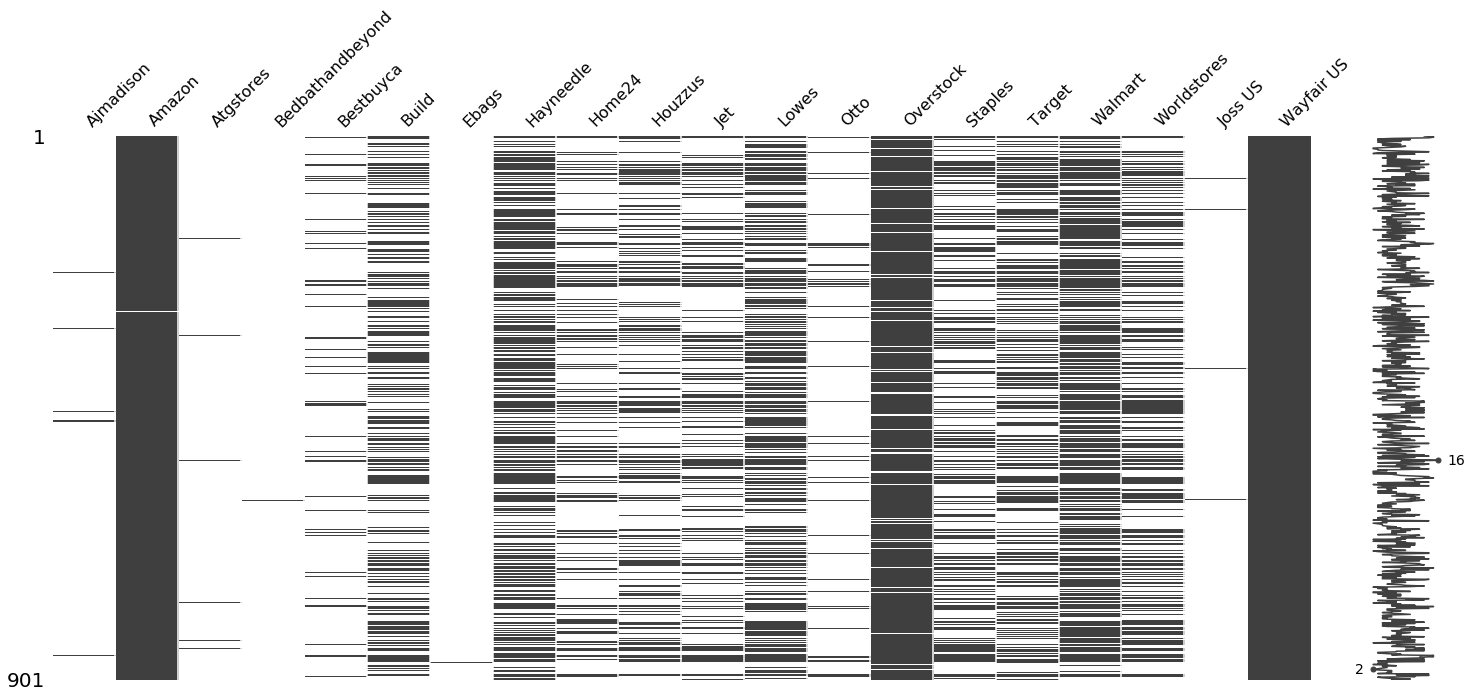

In [166]:
msno.matrix(df)